C:\Users\ecobrain\AppData\Local\Temp/ipykernel_20540/2796126463.py:9: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1.0 / dist
C:\Users\ecobrain\AppData\Local\Temp/ipykernel_20540/2796126463.py:12: RuntimeWarning: invalid value encountered in true_divide
  weights /= weights.sum(axis=0)


(2500,)


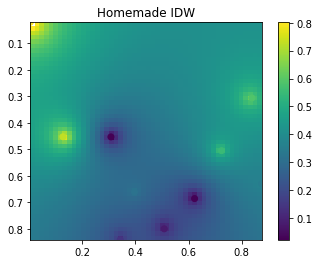

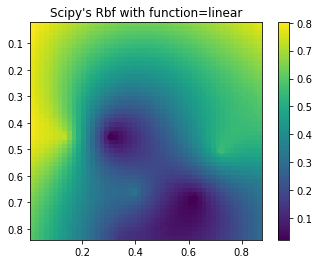

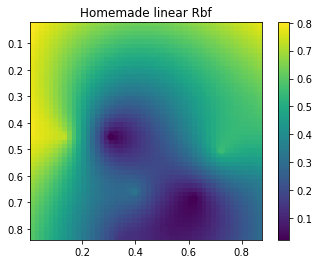

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

def simple_idw(x, y, z, xi, yi):
    dist = distance_matrix(x,y, xi,yi)

    # In IDW, weights are 1 / distance
    weights = 1.0 / dist

    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    zi = np.dot(weights.T, z)
    return zi

def linear_rbf(x, y, z, xi, yi):
    dist = distance_matrix(x,y, xi,yi)

    # Mutual pariwise distances between observations
    internal_dist = distance_matrix(x,y, x,y)

    # Now solve for the weights such that mistfit at the observations is minimized
    weights = np.linalg.solve(internal_dist, z)

    # Multiply the weights for each interpolated point by the distances
    zi =  np.dot(dist.T, weights)
    return zi

def scipy_idw(x, y, z, xi, yi):
    interp = Rbf(x, y, z, function='linear')
    return interp(xi, yi)

def distance_matrix(x0, y0, x1, y1):
    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    # Make a distance matrix between pairwise observations
    # Note: from <http://stackoverflow.com/questions/1871536>
    # (Yay for ufuncs!)
    d0 = np.subtract.outer(obs[:,0], interp[:,0])
    d1 = np.subtract.outer(obs[:,1], interp[:,1])

    return np.hypot(d0, d1)


def plot(x,y,z,grid):
    plt.figure()
    plt.imshow(grid, extent=(x.min(), x.max(), y.max(), y.min()))
    # plt.hold(True)
    plt.scatter(x,y,c=z)
    plt.colorbar()


def main():
    # Setup: Generate data...
    n = 10
    nx, ny = 50, 50
    x, y, z = map(np.random.random, [n, n, n])
    xi = np.linspace(x.min(), x.max(), nx)
    yi = np.linspace(y.min(), y.max(), ny)
    xi, yi = np.meshgrid(xi, yi)
    xi, yi = xi.flatten(), yi.flatten()

    # Calculate IDW
    grid1 = simple_idw(x,y,z,xi,yi)
    grid1 = grid1.reshape((ny, nx))

    # Calculate scipy's RBF
    grid2 = scipy_idw(x,y,z,xi,yi)
    grid2 = grid2.reshape((ny, nx))

    grid3 = linear_rbf(x,y,z,xi,yi)
    print(grid3.shape)
    grid3 = grid3.reshape((ny, nx))


    # Comparisons...
    plot(x,y,z,grid1)
    plt.title('Homemade IDW')

    plot(x,y,z,grid2)
    plt.title("Scipy's Rbf with function=linear")

    plot(x,y,z,grid3)
    plt.title('Homemade linear Rbf')

    plt.show()


main()

In [16]:
n = 10
nx, ny = 50, 50
x, y, z = map(np.random.random, [n, n, n])
# xi = np.linspace(x.min(), x.max(), nx)
# yi = np.linspace(y.min(), y.max(), ny)
# xi, yi = np.meshgrid(xi, yi)
# xi, yi = xi.flatten(), yi.flatten()

In [42]:
xi = np.linspace(x.min(), x.max(), nx)
yi = np.linspace(y.min(), y.max(), ny)


In [43]:
xi, yi = np.meshgrid(xi, yi)
xi, yi = xi.flatten(), yi.flatten()